<a href="https://colab.research.google.com/github/fsndzomga/Deep-Learning-With-Python/blob/main/Anomaly_detection_in_large_datasets_using_unsupervised_machine_learning_algorithms_such_as_clustering_and_deep_autoencoders_with_scikit_learn_and_TensorFlow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

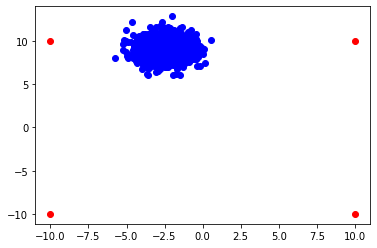

In [7]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_blobs(n_samples=1000, centers=1, random_state=42)
anomalies = [[-10, -10], [10, 10], [10, -10], [-10, 10]]
X = np.concatenate([X, anomalies], axis=0)
y = np.concatenate([y, np.ones(4)], axis=0)

# Split the data into normal and anomaly sets
normal_data = X[y == 0]
anomaly_data = X[y == 1]

# Plot the normal data
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue')

# Plot the anomalies
plt.scatter(anomaly_data[:, 0], anomaly_data[:, 1], c='red')

plt.show()


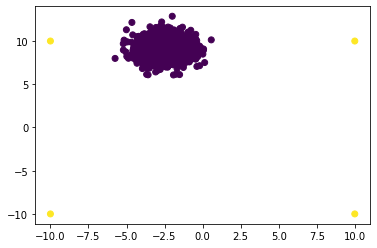

In [13]:
from sklearn.cluster import KMeans

# Perform clustering
kmeans = KMeans(n_clusters=1, random_state=42).fit(X)

# Calculate distances
distances = kmeans.transform(X)

# Set a threshold for anomaly detection
threshold = np.percentile(distances, 99.7)

# Mark anomalies
anomaly_mask = distances > threshold
plt.scatter(X[:, 0], X[:, 1], c=anomaly_mask)
plt.show()


Epoch 1/100
32/32 [==============================] - 2s 2ms/step - loss: 46.2789
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 44.4560
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 43.6663
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 42.2443
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 35.7027
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 17.4928
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5084
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5153
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5027
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4987
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4976
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4963
Epoch 13/100
32/32 [===========

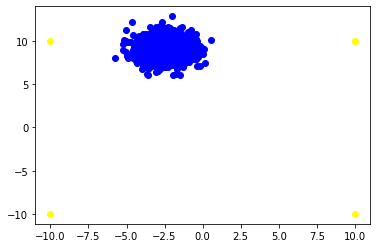

In [15]:
from tensorflow.keras import Model, regularizers
from tensorflow.keras.layers import Input, Dense

# Perform autoencoder anomaly detection
input_layer = Input(shape=(2,))
encoded = Dense(16, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(8, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(4, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(2)(decoded)

# Define the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model on the normal data
normal_data = X[y == 0]
autoencoder.fit(normal_data, normal_data, epochs=100, batch_size=32, shuffle=True)

# Reconstruct all the data points
reconstructions = autoencoder.predict(X)

# Calculate the reconstruction error
mse = np.mean(np.power(X - reconstructions, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 95)

# Mark anomalies
anomaly_mask = mse > threshold

# Plot the data with anomalies
normal_data = X[y == 0]
anomaly_data = X[y == 1]
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue')
plt.scatter(anomaly_data[:, 0], anomaly_data[:, 1], c='red')

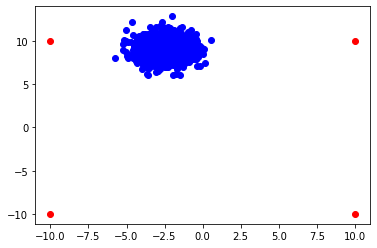

In [16]:
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue')
plt.scatter(anomaly_data[:, 0], anomaly_data[:, 1], c='red')